In [2]:
import numpy as np
import keras
from keras import layers
from keras import metrics
import numpy as np
import matplotlib.pyplot as plt

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#aaa
batch_size = 128
epochs = 15

2024-02-12 21:26:56.698286: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-12 21:26:57.017306: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 21:26:57.017339: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 21:26:57.063919: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-12 21:26:57.143673: I tensorflow/core/platform/cpu_feature_guar

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Accuracy vs Epochs

With default mnist model

2024-02-12 20:04:14.797147: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-12 20:04:15.071662: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:225] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-02-12 20:04:15.071684: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:228] Used ptxas at ptxas
2024-02-12 20:04:15.072112: W external/local_xla/xla/stream_executor/gpu/redzone_allocator.cc:322] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-02-12 20:04:15.934991: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-12 20:04:15.935027: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kerne

Test loss model_base: 0.08860371261835098 accuracy 0.9746000170707703  epochs : 0
Test loss model_base: 0.057127825915813446 accuracy 0.9819999933242798  epochs : 1
Test loss model_base: 0.0461789034307003 accuracy 0.9850999712944031  epochs : 2
Test loss model_base: 0.04152918979525566 accuracy 0.9865999817848206  epochs : 3
Test loss model_base: 0.03533848747611046 accuracy 0.988099992275238  epochs : 4
Test loss model_base: 0.03323442116379738 accuracy 0.9883999824523926  epochs : 5
Test loss model_base: 0.03051956556737423 accuracy 0.9904000163078308  epochs : 6
Test loss model_base: 0.02966056764125824 accuracy 0.989300012588501  epochs : 7
Test loss model_base: 0.028556738048791885 accuracy 0.9904999732971191  epochs : 8
Test loss model_base: 0.027891598641872406 accuracy 0.9901000261306763  epochs : 9
Test loss model_base: 0.027833007276058197 accuracy 0.9896000027656555  epochs : 10
Test loss model_base: 0.02705184370279312 accuracy 0.9901999831199646  epochs : 11
Test loss mod

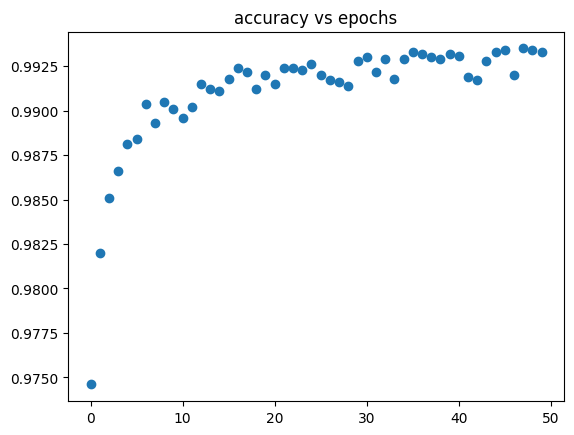

In [7]:
## model base / epoch
model_base = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_base.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
accuracy_list=[]
for i in range(50):
  model_base.fit(x_train, y_train, batch_size=batch_size, epochs=1, validation_split=0.1,verbose=0)
  score = model_base.evaluate(x_test, y_test, verbose=0)
  accuracy_list.append((i,score[1]))
  print("Test loss model_base:", score[0],"accuracy",score[1], " epochs :",i)

plt.figure()
plt.title("accuracy vs epochs")
plt.scatter(*zip(*accuracy_list))
plt.show()

# Accuracy vs Batch size

With default mnist model

Test loss model_base: 0.02391599491238594 accuracy 0.9914000034332275  batch size : 32
Test loss model_base: 0.02569563314318657 accuracy 0.9908000230789185  batch size : 160
Test loss model_base: 0.027287336066365242 accuracy 0.9904999732971191  batch size : 288
Test loss model_base: 0.028906041756272316 accuracy 0.9897000193595886  batch size : 416
Test loss model_base: 0.0300945732742548 accuracy 0.9894999861717224  batch size : 544
Test loss model_base: 0.03223497420549393 accuracy 0.9887999892234802  batch size : 672
Test loss model_base: 0.03606062009930611 accuracy 0.9878000020980835  batch size : 800
Test loss model_base: 0.037181317806243896 accuracy 0.9876999855041504  batch size : 928
Test loss model_base: 0.04116528481245041 accuracy 0.9864000082015991  batch size : 1056
Test loss model_base: 0.03899133577942848 accuracy 0.9865000247955322  batch size : 1184
Test loss model_base: 0.039116021245718 accuracy 0.9868000149726868  batch size : 1312
Test loss model_base: 0.043952

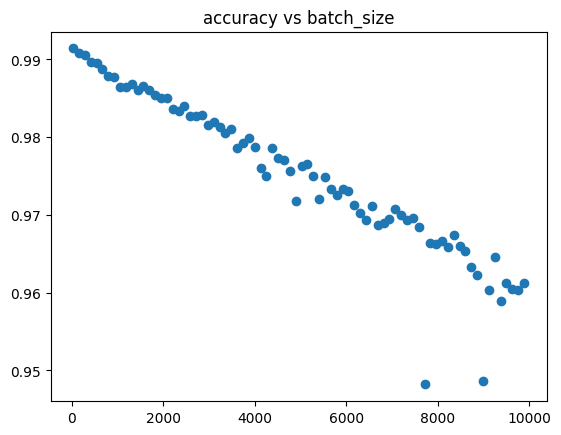

In [4]:
accuracy_list=[]
for i in range(32,10000,128):
  model_base = keras.Sequential(
      [
          keras.Input(shape=input_shape),
          layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Flatten(),
          layers.Dropout(0.5),
          layers.Dense(num_classes, activation="softmax"),
      ]
  )
  model_base.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  model_base.fit(x_train, y_train, batch_size=i, epochs=epochs, validation_split=0.1,verbose=0)
  score = model_base.evaluate(x_test, y_test, verbose=0)
  accuracy_list.append((i,score[1]))
  print("Test loss model_base:", score[0],"accuracy",score[1], " batch size :",i)

plt.figure()
plt.title("accuracy vs batch_size")
plt.scatter(*zip(*accuracy_list))
plt.show()

# Remove some layers

In [20]:
name=[]
values=[]
##
model_base = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_base.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_base.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)
score = model_base.evaluate(x_test, y_test, verbose=0)
print("Test loss model_base :", score[0],"accuracy",score[1])
name.append('base')
values.append(score[1])
##
model_base = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_base.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_base.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)
score = model_base.evaluate(x_test, y_test, verbose=0)
print("Test loss model_base no dropout:", score[0],"accuracy",score[1])
name.append('no dropout')
values.append(score[1])
##
model_base = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_base.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_base.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)
score = model_base.evaluate(x_test, y_test, verbose=0)
print("Test loss model_base no 2nd conv2D:", score[0],"accuracy",score[1])
name.append('no 2nd conv2D')
values.append(score[1])
##
model_base = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_base.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_base.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)
score = model_base.evaluate(x_test, y_test, verbose=0)
print("Test loss model_base no 1st conv2D:", score[0],"accuracy",score[1])
name.append('no 1st conv2D')
values.append(score[1])
##  


Test loss model_base : 0.024152422323822975 accuracy 0.9922999739646912
Test loss model_base no dropout: 0.04197106510400772 accuracy 0.988099992275238
Test loss model_base no 2nd conv2D: 0.04817052558064461 accuracy 0.984000027179718
Test loss model_base no 1st conv2D: 0.04698656126856804 accuracy 0.9850000143051147


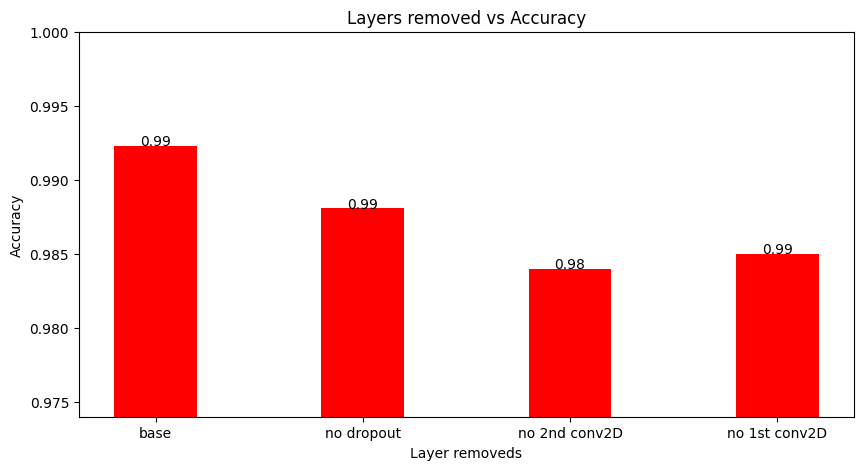

In [21]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, values, color ='red', 
        width = 0.4)
 
plt.xlabel("Layer removeds")
plt.ylabel("Accuracy")
for i in range(len(name)):
        plt.text(i, values[i], "{:.2f}".format(values[i]), ha = 'center')
plt.ylim(min(values)-0.01,1)
plt.title("Layers removed vs Accuracy")
plt.show()

# Compile metric vs Accuracy
On base model

In [5]:
name=[]
values=[]
##
model_base = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_base.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_base.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)
score = model_base.evaluate(x_test, y_test, verbose=0)
print("Test loss model_base :", score[0],"accuracy",score[1])
name.append('base')
values.append(score[1])
##
model_base = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_base.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[metrics.MeanSquaredError(),metrics.AUC(),])
model_base.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)
score = model_base.evaluate(x_test, y_test, verbose=0)
print("Test loss model_base meansquare AUC :", score[0],"accuracy",score[1])
name.append('MeanSquaredError/AUC')
values.append(score[1])
##
model_base = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_base.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[metrics.BinaryAccuracy()])
model_base.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)
score = model_base.evaluate(x_test, y_test, verbose=0)
print("Test loss model_base binary_accuracy :", score[0],"accuracy",score[1])
name.append('BinaryAccuracy')
values.append(score[1])
##
model_base = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_base.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[metrics.BinaryCrossentropy()])
model_base.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)
score = model_base.evaluate(x_test, y_test, verbose=0)
print("Test loss model_base BinaryCrossentropy :", score[0],"accuracy",score[1])
name.append('BinaryCrossentropy')
values.append(score[1])
##
model_base = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_base.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[metrics.AUC()])
model_base.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)
score = model_base.evaluate(x_test, y_test, verbose=0)
print("Test loss model_base AUC :", score[0],"accuracy",score[1])
name.append('AUC')
values.append(score[1])


2024-02-12 21:28:01.685887: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 21:28:01.726206: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 21:28:01.726239: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 21:28:01.727958: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 21:28:01.727989: I external/local_xla/xla/stream_executor

Test loss model_base : 0.025311920791864395 accuracy 0.9921000003814697


2024-02-12 21:28:59.603124: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-12 21:28:59.603175: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-12 21:28:59.603678: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-12 21:28:59.603716: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-12 21:28:59.604305: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-12

Test loss model_base meansquare AUC : 0.02410757914185524 accuracy 0.0012349853059276938
Test loss model_base binary_accuracy : 0.024471452459692955 accuracy 0.9983999729156494


2024-02-12 21:29:52.695968: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-12 21:29:52.715483: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-12 21:29:52.744712: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-12 21:29:52.769469: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.


Test loss model_base BinaryCrossentropy : 0.023919982835650444 accuracy 0.243913471698761
Test loss model_base AUC : 0.024504372850060463 accuracy 0.9998113512992859


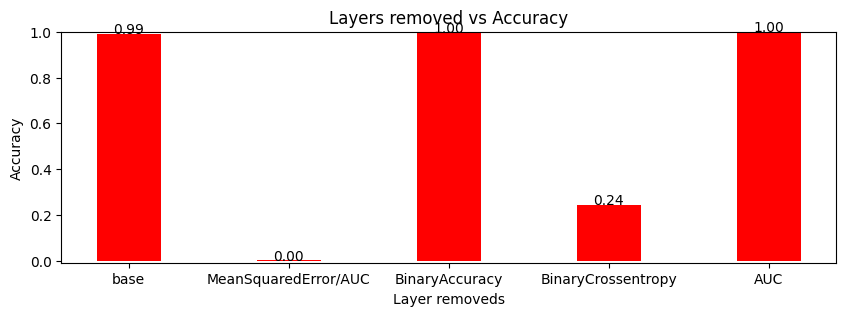

In [ ]:
fig = plt.figure(figsize=(10, 3))
# creating the bar plot
plt.bar(name, values, color ='red', 
        width = 0.4)
 
plt.xlabel("Layer removeds")
plt.ylabel("Accuracy")
plt.ylim(min(values)-0.01,1)
plt.title("Metrics vs Accuracy")
for i in range(len(name)):
        plt.text(i, values[i], "{:.2f}".format(values[i]), ha = 'center')
plt.show()

# Number of neurons per dense layer

In [24]:
name=[]
values=[]

In [25]:

##
model_base = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_base.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_base.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)
score = model_base.evaluate(x_test, y_test, verbose=0)
print("Test loss model_base :", score[0],"accuracy",score[1])
name.append('base')
values.append(score[1])


Test loss model_base : 0.022520510479807854 accuracy 0.9915000200271606


In [26]:
##
##
model_base = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(256, activation="softmax"),
        layers.Dense(128, activation="softmax"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_base.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_base.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)
score = model_base.evaluate(x_test, y_test, verbose=0)
print("Test loss model_base 3 dense :", score[0],"accuracy",score[1])
name.append('3 dense')
values.append(score[1])


Test loss model_base 3 dense : 0.5102471709251404 accuracy 0.7055000066757202


In [27]:
##
model_base = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1024, activation="softmax"),
        layers.Dense(512, activation="softmax"),
        layers.Dense(256, activation="softmax"),
        layers.Dense(128, activation="softmax"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_base.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_base.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)
score = model_base.evaluate(x_test, y_test, verbose=0)
print("Test loss model_base 5 dense :", score[0],"accuracy",score[1])
name.append('5 dense')
values.append(score[1])


Test loss model_base 5 dense : 2.301117181777954 accuracy 0.11349999904632568


In [29]:
##
model_base = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.AveragePooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_base.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_base.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)
score = model_base.evaluate(x_test, y_test, verbose=0)
print("Test loss model_base AveragePooling2D :", score[0],"accuracy",score[1])
name.append('AveragePooling2D')
values.append(score[1])
##

Test loss model_base SpatialDropout2D : 0.032765671610832214 accuracy 0.9900000095367432


In [33]:
##
model_base = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(28*28, activation="softmax"),
        #layers.Reshape((28,28)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.AveragePooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_base.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_base.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)
score = model_base.evaluate(x_test, y_test, verbose=0)
print("Test loss model_base Reshape dense :", score[0],"accuracy",score[1])
name.append('Reshape dense')
values.append(score[1])
##

Test loss model_base Reshape dense : 2.3009798526763916 accuracy 0.11349999904632568


In [41]:
##
model_base = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(28*28, activation="softmax"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation="softplus"),
        layers.Dense(16, activation="softsign"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_base.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_base.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)
score = model_base.evaluate(x_test, y_test, verbose=0)
print("Test loss model_base dense mainly :", score[0],"accuracy",score[1])
name.append('dense mainly')
values.append(score[1])
##

2024-02-12 22:33:48.178215: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-12 22:33:48.374600: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-12 22:33:48.410507: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.


Test loss model_base dense only : 2.3017070293426514 accuracy 0.11349999904632568


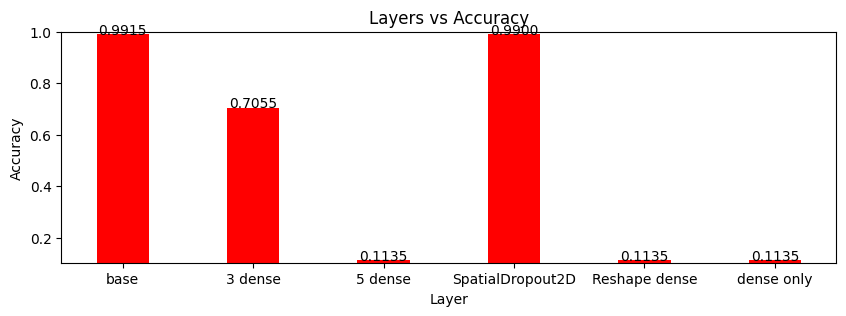

In [42]:
fig = plt.figure(figsize=(10, 3))
# creating the bar plot
plt.bar(name, values, color ='red', 
        width = 0.4)
 
plt.xlabel("Layer")
plt.ylabel("Accuracy")
plt.ylim(min(values)-0.01,1)
plt.title("Layers vs Accuracy")
for i in range(len(name)):
        plt.text(i, values[i], "{:.4f}".format(values[i]), ha = 'center')
plt.show()